In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import string

# libraries for POS tagging and identification
import spacy
nlp = spacy.load('en_core_web_sm')

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chingyiie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chingyiie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Importing data

In [23]:
df = pd.read_csv("../data/preprocessed_cleaned_body.csv")

In [24]:
df.head()

,Body,Bias,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,1.67,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,0.67,federal appeal court rejected direct constitut...
2,As part of the Trump administration's effort t...,-2.75,part trump administration effort slow migrant ...
3,"President Donald Trump and ""the Trump of the T...",-4.33,president donald trump trump tropic brazilian ...
4,"U.S Senator Elizabeth Warren, who is competing...",-10.00,u senator elizabeth warren competing democrati...


## Converting bias to categorical (binary)

In [48]:
right = df.loc[df['Bias'] > 0]
left = df.loc[df['Bias'] <= 0]

# 1 = Right bias, 0 = Left bias
right['Bias'] = 1
left['Bias'] = 0

cat_df = pd.concat([right, left])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
cat_df.head()

,Body,Bias,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,1,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,1,federal appeal court rejected direct constitut...
7,Michael Cohen has been officially disbarred in...,1,michael cohen ha officially disbarred new york...
13,President Donald Trump has vetoed a resolution...,1,president donald trump ha vetoed resolution st...
15,Newly-released body camera footage reveals the...,1,newlyreleased body camera footage reveals dram...


## Preparing training and testing data

In [50]:
X = cat_df.iloc[:, cat_df.columns != 'Bias']
y = cat_df['Bias']

In [51]:
X.head()

,Body,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,federal appeal court rejected direct constitut...
7,Michael Cohen has been officially disbarred in...,michael cohen ha officially disbarred new york...
13,President Donald Trump has vetoed a resolution...,president donald trump ha vetoed resolution st...
15,Newly-released body camera footage reveals the...,newlyreleased body camera footage reveals dram...


In [52]:
bow_transformer = CountVectorizer(max_features = 800)
bow = bow_transformer.fit_transform(X['cleaned_body'])

X = pd.DataFrame(bow.toarray(), columns=bow_transformer.get_feature_names())

In [53]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [54]:
X.head()

,ability,able,abortion,abuse,access,according,account,accused,across,act,...,would,wrong,wrote,year,yearold,yet,york,you,young,zealand
0,0.0,0.0,0.52381,0.0,0.2,0.0,0.0,0.0,0.142857,0.000000,...,0.018182,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.153846,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.018182,0.0,0.000000,0.000000,0.0,0.0,0.130435,0.000000,0.000000,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,...,0.000000,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.025641,0.4,0.0,0.000000,0.066667,0.111111,0.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 1. Gaussian Naive Bayes

In [56]:
# Defining Model
gnb = GaussianNB()
# Training Model
gnb.fit(X_train, y_train)
# Making Predictions
y_pred = gnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.5083532219570406


In [57]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.5833199679230152


## 2. Multinomial Naive Bayes

In [60]:
# Defining Model
mnb = MultinomialNB()
# Training Model
mnb.fit(X_train, y_train)
# Making Predictions
y_pred = mnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7088305489260143


In [62]:
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.6944667201283079


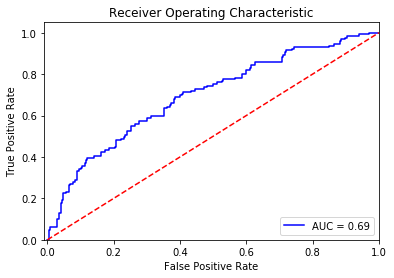

In [63]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       290
           1       0.63      0.13      0.22       129

    accuracy                           0.71       419
   macro avg       0.67      0.55      0.52       419
weighted avg       0.69      0.71      0.64       419



In [69]:
print('F1 score: ', f1_score(y_test, y_pred))

F1 score:  0.21794871794871795
